# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as sp

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
combined_data = pd.merge(mouse_metadata, study_results, how='outer', on="Mouse ID")

# Display the data table for preview
combined_data = combined_data[['Mouse ID', 
                               'Timepoint', 
                               'Tumor Volume (mm3)', 
                               'Metastatic Sites', 
                               'Drug Regimen',
                               'Sex',
                               'Age_months',
                               'Weight (g)']]
combined_data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,0,45.000000,0,Infubinol,Female,20,23
1,a203,5,48.508468,0,Infubinol,Female,20,23
2,a203,10,51.852437,1,Infubinol,Female,20,23
3,a203,15,52.777870,1,Infubinol,Female,20,23
4,a203,20,55.173336,1,Infubinol,Female,20,23


In [2]:
# Checking the number of mice.
mice = combined_data['Mouse ID'].value_counts()
mice

Mouse ID
g989    13
a203    10
n364    10
m546    10
m550    10
        ..
x226     1
b447     1
f932     1
l872     1
n482     1
Name: count, Length: 249, dtype: int64

In [3]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mice = combined_data.loc[combined_data.duplicated(subset=['Mouse ID', 'Timepoint',]), 'Mouse ID'].unique
duplicate_mice

<bound method Series.unique of 587    g989
589    g989
591    g989
593    g989
595    g989
Name: Mouse ID, dtype: object>

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_mice_df = combined_data.loc[combined_data['Mouse ID'] == "g989",:]
index_df = combined_data.set_index("Mouse ID")
index_df.loc['g989']

,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
Mouse ID,,,,,,,
g989,0,45.000000,0,Propriva,Female,21,26
g989,0,45.000000,0,Propriva,Female,21,26
g989,5,48.786801,0,Propriva,Female,21,26
g989,5,47.570392,0,Propriva,Female,21,26
g989,10,51.745156,0,Propriva,Female,21,26
g989,10,49.880528,0,Propriva,Female,21,26
g989,15,51.325852,1,Propriva,Female,21,26
g989,15,53.442020,0,Propriva,Female,21,26
g989,20,55.326122,1,Propriva,Female,21,26


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df = index_df.drop(['g989'])

In [6]:
clean_mice = clean_df.reset_index()

In [7]:
# Checking the number of mice in the clean DataFrame.
clean_mice["Mouse ID"].value_counts()


Mouse ID
a203    10
l897    10
m546    10
m550    10
m601    10
        ..
d133     1
b447     1
u153     1
v199     1
t573     1
Name: count, Length: 248, dtype: int64

## Summary Statistics

In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.
regimen = clean_mice.groupby(['Drug Regimen'])

regimen_mean = regimen["Tumor Volume (mm3)"].mean()
regimen_median = regimen["Tumor Volume (mm3)"].median()
regimen_variance = regimen["Tumor Volume (mm3)"].var()
regimen_std = regimen["Tumor Volume (mm3)"].std()
regimen_sem = regimen["Tumor Volume (mm3)"].sem()


regimen_df = pd.DataFrame({"Mean Tumor Volume": regimen_mean, 
                                    "Median Tumor Volume":regimen_median, 
                                    "Tumor Volume Variance":regimen_variance, 
                                    "Tumor Volume Std. Dev.": regimen_std, 
                                    "Tumor Volume Std. Err.": regimen_sem})

regimen_df

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [9]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line

summary_agg =  clean_df.groupby(['Drug Regimen'])[['Tumor Volume (mm3)']].agg(['mean', 'median', 'var', 'std', 'sem'])
summary_agg

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

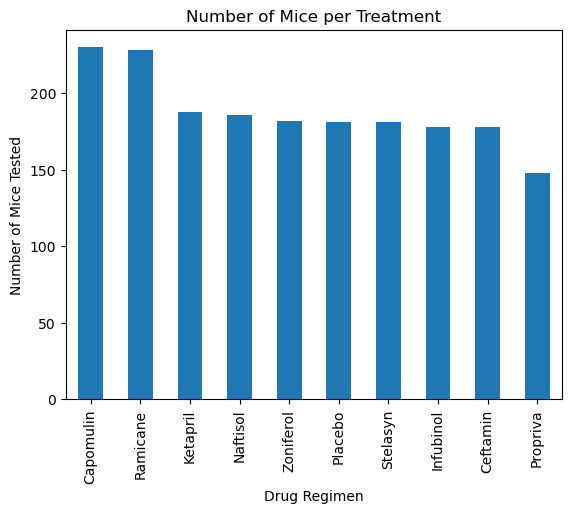

In [10]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.

mice_count = clean_df["Drug Regimen"].value_counts()

plot_pandas = mice_count.plot.bar(color='tab:blue')  

# Set the xlabel, ylabel, and title using class methods
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice Tested")
plt.title("Number of Mice per Treatment")

plt.show()

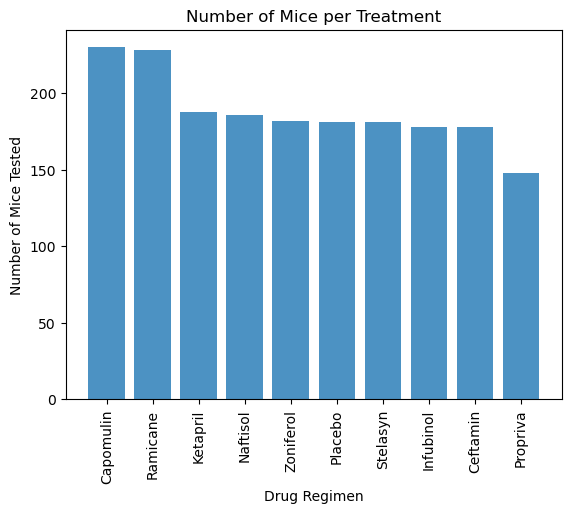

In [11]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pyplot.
x_axis = mice_count.index.values
y_axis = mice_count.values

# Create a Pyplot bar plot based off of the group series from before and label the title
plt.bar(x_axis, y_axis, color='tab:blue', alpha=0.8, align='center')

# Set the xlabel and ylabel, title using class methods
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice Tested")
plt.xticks(rotation="vertical")
plt.title("Number of Mice per Treatment")

plt.show()

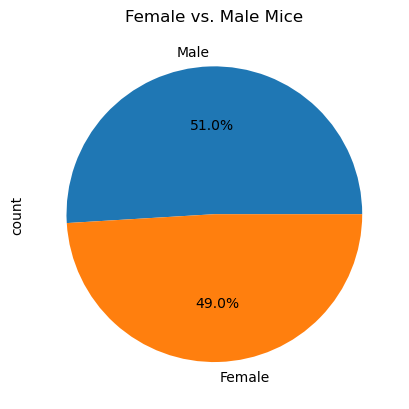

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
gender_data = clean_df["Sex"].value_counts()
gender_data.plot.pie(autopct= "%1.1f%%")
plt.title("Female vs. Male Mice")
plt.show()

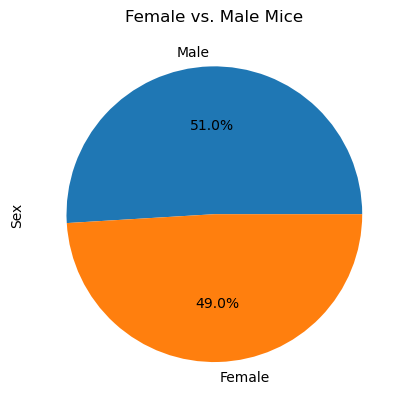

In [13]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
labels = ['Female', 'Male']
sizes = [49.7999197, 50.200803]
plot = gender_data.plot.pie(y='Total Count', autopct="%1.1f%%")
plt.ylabel('Sex')
plt.title("Female vs. Male Mice")
plt.show()

## Quartiles, Outliers and Boxplots

In [14]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
last_time = clean_mice.groupby(['Mouse ID'])['Timepoint'].max()
last_time_df = pd.DataFrame(last_time)
# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
last_df = pd.merge(clean_mice, last_time_df, on=('Mouse ID', 'Timepoint'), how='right')
last_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a262,45,70.717621,4,Placebo,Female,17,29
3,a275,45,62.999356,3,Ceftamin,Female,20,28
4,a366,30,63.440686,1,Stelasyn,Female,16,29
...,...,...,...,...,...,...,...,...
243,z435,10,48.710661,0,Propriva,Female,12,26
244,z578,45,30.638696,0,Ramicane,Male,11,16
245,z581,45,62.754451,3,Infubinol,Female,24,25
246,z795,45,65.741070,3,Naftisol,Female,13,29


In [15]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ["Capomulin", "Ramicane","Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_cap = []
tumor_ram = []
tumor_inf = []
tumor_cef = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
for index, row in last_df.iterrows():
    if row["Drug Regimen"] == treatments[0]:
        tumor_cap.append(row['Tumor Volume (mm3)'])
    if row["Drug Regimen"] == treatments[1]:
        tumor_ram.append(row['Tumor Volume (mm3)'])
    if row["Drug Regimen"] == treatments[2]:
        tumor_inf.append(row['Tumor Volume (mm3)'])
    if row["Drug Regimen"] == treatments[3]:
        tumor_cef.append(row['Tumor Volume (mm3)'])
    
    # add subset 
drug_df = pd.DataFrame({treatments[0]: tumor_cap,
                        treatments[1]: tumor_ram,
                        treatments[2]: tumor_inf,
                        treatments[3]: tumor_cef})
    
    # Determine outliers using upper and lower bounds
drug_df_max = drug_df.max()
drug_df_min = drug_df.min()
drug_df

,Capomulin,Ramicane,Infubinol,Ceftamin
0,38.982878,38.407618,67.973419,62.999356
1,38.939633,43.047543,65.525743,45.000000
2,30.485985,38.810366,57.031862,56.057749
3,37.074024,32.978522,66.083066,55.742829
4,40.159220,38.342008,72.226731,48.722078
5,47.685963,33.397653,36.321346,47.784682
6,37.311846,37.311236,60.969711,61.849023
7,38.125164,40.659006,62.435404,68.923185
8,38.753265,29.128472,60.918767,67.748662
9,41.483008,33.562402,67.289621,57.918381


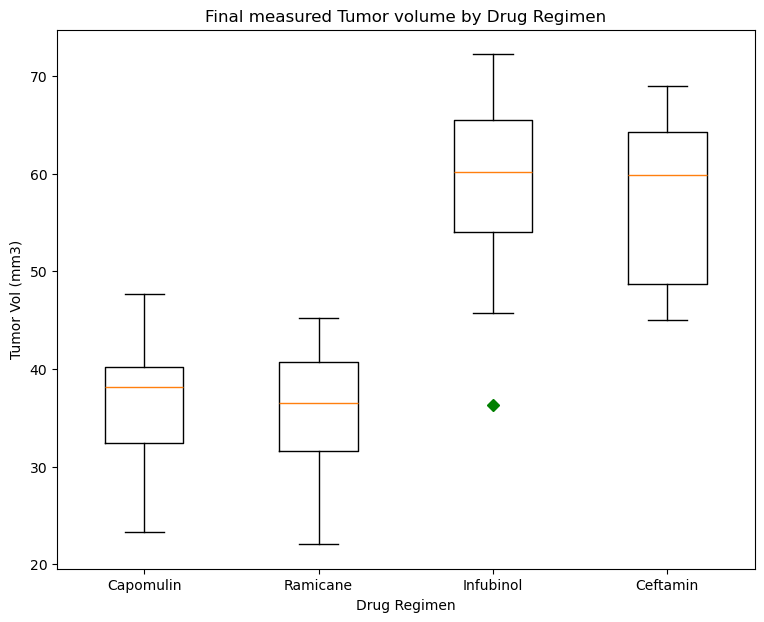

In [16]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
boxplot_list = [drug_df[treatments[0]],
                drug_df[treatments[1]],
                drug_df[treatments[2]],
                drug_df[treatments[3]]]
# define the size
fig1, ax = plt.subplots(figsize=(9,7))
ax.set_title('Final measured Tumor volume by Drug Regimen') #set title
ax.set_xlabel('Drug Regimen') # set x label
ax.set_ylabel('Tumor Vol (mm3)') #set y lable
# used ax.boxplot function and ran the parameter boxplot_list to create the boxplot
ax.boxplot(boxplot_list, 0, 'gD')
plt.xticks([1,2,3,4], treatments) # set labels of each boxplot
plt.savefig('boxplot')
plt.show()

## Line and Scatter Plots

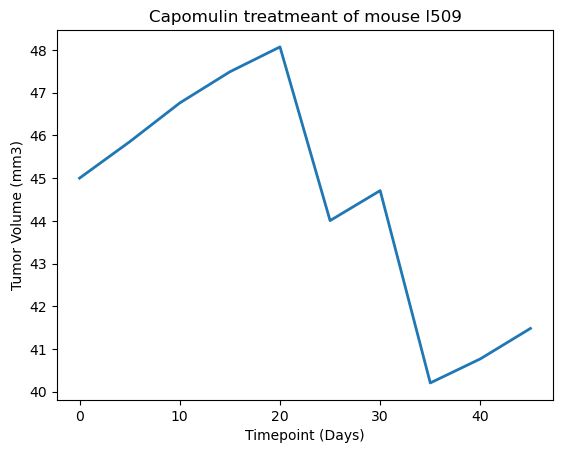

In [17]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
line_df = clean_mice.loc[clean_mice["Mouse ID"] == "l509",:]
line_df
# defined the x axis list by calling the timepoints from the l509 dataframe
x_axisTP = line_df["Timepoint"] 
# defined the y axis or tumor size list by calling the tumor size from the dataframe
tumsiz = line_df["Tumor Volume (mm3)"] 

plt.title('Capomulin treatmeant of mouse l509') # created title
# the plot function plt.plot() with x and y values and customizations
plt.plot(x_axisTP, tumsiz,linewidth=2, markersize=12) 
plt.xlabel('Timepoint (Days)')
plt.ylabel('Tumor Volume (mm3)')

plt.savefig('linechart')
plt.show()

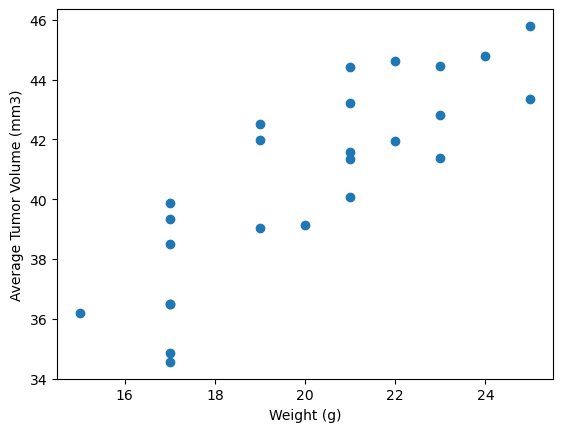

,Timepoint,Tumor Volume (mm3),Metastatic Sites,Age_months,Weight (g)
Mouse ID,,,,,
b128,22.5,41.963636,0.70,9.0,22.0
b742,22.5,40.083699,0.00,7.0,21.0
f966,10.0,36.505973,0.00,16.0,17.0
g288,22.5,41.990097,0.80,3.0,19.0
g316,22.5,44.613344,1.00,22.0,22.0
i557,22.5,44.805810,0.20,1.0,24.0
i738,22.5,39.141053,0.60,23.0,20.0
j119,22.5,44.465236,0.60,7.0,23.0
j246,17.5,43.216925,0.25,21.0,21.0


In [18]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
cap_df = clean_df.loc[clean_df["Drug Regimen"] == "Capomulin",:]
# use groupby() and mean() to create a dataframe
cap_avg = cap_df.groupby(['Mouse ID']).mean(numeric_only=True)
# created scatter plot of weight (x) and tumor size (y) 
plt.scatter(cap_avg['Weight (g)'],cap_avg['Tumor Volume (mm3)'])
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')

plt.savefig('scatterplot')
plt.show()
cap_avg

## Correlation and Regression

In [19]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
corr_coeff=round(sp.pearsonr(cap_avg['Weight (g)'],cap_avg['Tumor Volume (mm3)'])[0],2)
print(f"The correlation between mouse weight and average tumor volume is {corr_coeff}")

The correlation between mouse weight and average tumor volume is 0.84
